In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
class LinearRegression:
    
    def __init__(self):
        self.W = None
        self.b = None
        
    def __initialization(self, m_features):
        self.W = np.random.randn(m_features, 1)
        self.b = np.random.randn(1, 1)        
    
    def __mse(self, y, y_hat):
        n = y.shape[0]
        return np.sum((y - y_hat)**2)/n    
    
    def fit(self, X, y, learning_rate=0.01, steps=1000):
        n, m_features = X.shape
        self.__initialization(m_features)
        for i in range(steps):
            y_hat = self.predict(X) 
            if i%100==0:
                print(f"Step {i}. MSE={self.__mse(y, y_hat)}")
            dW = (-2*np.dot(X.T, (y-y_hat))/n).reshape(m_features,-1)
            db = -2*np.sum(y - y_hat)/n
            self.W -= learning_rate*dW
            self.b -= learning_rate*db
    
    def predict(self, X):
        return (np.dot(X, self.W) + self.b).reshape(X.shape[0])

### Sintetic data

In [73]:
X = np.linspace(0, 10, 50)
k, b = .5, 1 
y = X*k + b + 2*np.random.rand(50)
X = X.reshape(50,-1)

In [113]:
lr = LinearRegression()
lr.fit(X, y, steps=2000)

Step 0. MSE=175.77622783095777
Step 100. MSE=0.3360370672003226
Step 200. MSE=0.32249420625013564
Step 300. MSE=0.3175639153844658
Step 400. MSE=0.31576903850361204
Step 500. MSE=0.3151156119401094
Step 600. MSE=0.3148777314044328
Step 700. MSE=0.3147911307787246
Step 800. MSE=0.31475960374204737
Step 900. MSE=0.31474812629562576
Step 1000. MSE=0.31474394792080057
Step 1100. MSE=0.31474242677963926
Step 1200. MSE=0.3147418730068139
Step 1300. MSE=0.31474167140531234
Step 1400. MSE=0.31474159801210194
Step 1500. MSE=0.314741571293237
Step 1600. MSE=0.31474156156620986
Step 1700. MSE=0.3147415580250767
Step 1800. MSE=0.31474155673592397
Step 1900. MSE=0.3147415562666067


<AxesSubplot:>

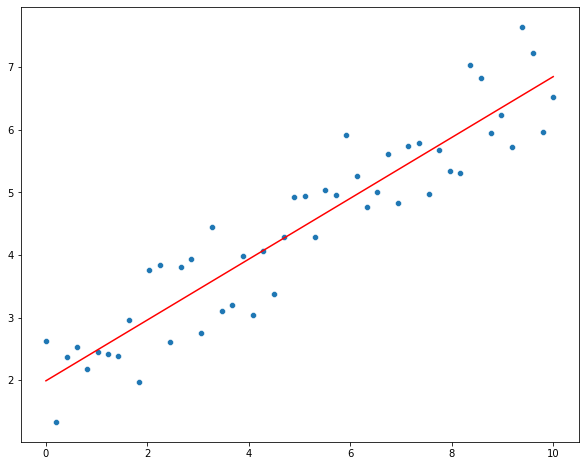

In [114]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=y, ax=ax)
sns.lineplot(x=X[:,0], y=lr.predict(X), c='red', ax=ax)

### Checking through a Closed-Form Solution

$W=(X^{T}X)^{-1}X^{T}Y$ where X is extended input data X with column filled ones

In [115]:
b = np.array([1 for _ in range(50)]).reshape(50,-1)
X_ext = np.hstack((X, b))
W = np.dot(np.dot(np.linalg.inv(np.dot(X_ext.T, X_ext)), X_ext.T), y)

In [116]:
W

array([0.48577892, 1.99042286])

In [117]:
print(f"W={lr.W} and b={lr.b}")

W=[[0.48578183]] and b=[[1.99040337]]
